In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [85]:
barcolor = ['green', 'blue', 'orange' ]
legend = ["ILP", "Greedy", 'RL']

In [86]:
thres = 20

# Set A

In [87]:
#==========================================Read Data
data = pd.read_csv(f'allocation_results/allocation_for_user500_thres{thres}.csv')
#data['ilp_qoe'] = data['ilp_qoe'].abs() #few results are actually positive but showing negetive
data

,user,server,ilp_user,ilp_time,greedy_user,greedy_time,rl_user,rl_time
0,500.0,20.0,97.0,6.207456,78.0,0.088354,250.0,0.628346
1,500.0,20.0,103.0,0.504467,78.0,0.088777,291.0,0.010654
2,500.0,20.0,103.0,0.485849,75.0,0.089440,265.0,0.010479
3,500.0,20.0,96.0,0.702882,77.0,0.077422,238.0,0.010134
4,500.0,20.0,97.0,0.524359,76.0,0.084415,243.0,0.010994
...,...,...,...,...,...,...,...,...
195,500.0,80.0,326.0,26.125653,276.0,0.330033,459.0,0.045198
196,500.0,80.0,327.0,26.215008,281.0,0.331654,483.0,0.046406
197,500.0,80.0,330.0,26.257204,278.0,0.321778,467.0,0.041296
198,500.0,80.0,334.0,26.154649,292.0,0.338694,483.0,0.044377


In [88]:
# user_data = data.groupby(['user', 'server'])
user_data = data.groupby('server') #switch between user or server parameter
num_user = user_data.mean()[['ilp_user', 'greedy_user', 'rl_user']]
num_user.index = num_user.index.astype(int) #change index to integer
time = user_data.mean()[['ilp_time', 'greedy_time', 'rl_time']]
time.index = time.index.astype(int)

In [89]:
#compute the log of time for plotting
time[['ilp_time', 'greedy_time', 'rl_time']] = time[['ilp_time', 'greedy_time', 'rl_time']].applymap(lambda x: math.log10(100*x))

In [90]:
num_user

,ilp_user,greedy_user,rl_user
server,,,
20,98.62,75.60,257.10
40,188.00,149.80,375.78
60,264.20,218.86,434.00
80,331.34,283.56,467.56


In [91]:
time

,ilp_time,greedy_time,rl_time
server,,,
20,1.859874,0.972642,0.375860
40,3.014502,1.276231,0.375281
60,3.371218,1.443806,0.548323
80,3.390302,1.527586,0.641456


In [92]:
#  (num_user['rl_lin_user'] - num_user['ilp_user'])

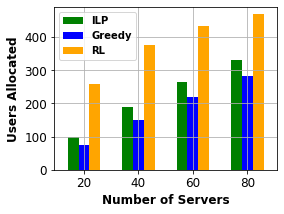

In [93]:
fig, ax = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size
num_user.plot(ax=ax, kind='bar', color= barcolor, width= 0.6)
ax.set_ylabel('Users Allocated', fontsize=12, fontweight="bold")

# ax.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax.set_xlabel("Number of Servers", fontsize=12, fontweight="bold")
ax.tick_params(axis='both', labelsize=12)

ax.legend(legend, fontsize=10, loc='upper left', prop = {'weight':'bold'})
ax.grid(True)
plt.xticks(rotation=0)

fig.set_figwidth(4)
fig.set_figheight(3)


fig.savefig(f"plots/alloc_user_u500_t{thres}.pdf",dpi=100, bbox_inches = "tight")

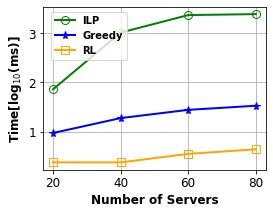

In [94]:
fig1, ax1 = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size


plt.locator_params(axis='x', nbins=5)
ax1.plot( 'ilp_time', data=time, marker='o', markerfacecolor='None', markersize=8, linewidth=2, zorder=2, color=barcolor[0])
ax1.plot( 'greedy_time', data=time, marker='*', linewidth=2, markersize=8, zorder=3, color = barcolor[1])
ax1.plot( 'rl_time', data=time, marker='s', markerfacecolor='None', linewidth=2, markersize=8, color=barcolor[2])
# ax1.plot( 'rl_exp_time', data=time, marker='^', linewidth=2, markersize=6,zorder=4, color=barcolor[3])

ax1.set_ylabel('Time[log$_{10}$(ms)]', fontsize=12, fontweight="bold")
# ax1.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax1.set_xlabel("Number of Servers", fontsize=12, fontweight="bold")

ax1.tick_params(axis='both', labelsize=12)
ax1.legend(legend, loc='upper right', bbox_to_anchor=(0.4, 1), prop = {'weight':'bold', 'size':  10})
ax1.grid(True)
plt.xticks(rotation = 0)

fig1.set_figwidth(4)
fig1.set_figheight(3)

# fig1.savefig(f"plots/alloc_time_u500_t{thres}.pdf",dpi=100, bbox_inches = "tight")

# Set B

In [95]:
#==========================================Read Data
data = pd.read_csv(f'allocation_results/allocation_for_s50_thres{thres}.csv')
#data['ilp_qoe'] = data['ilp_qoe'].abs() #few results are actually positive but showing negetive
data

,user,server,ilp_user,ilp_time,greedy_user,greedy_time,rl_lin_user,rl_lin_time,rl_exp_user,rl_exp_time
0,100.0,50.0,80.0,7.213915,79.0,0.039699,80.0,0.290198,0.0,0.0
1,100.0,50.0,82.0,0.231818,82.0,0.040577,83.0,0.018731,0.0,0.0
2,100.0,50.0,72.0,0.229727,72.0,0.038575,73.0,0.018222,0.0,0.0
3,100.0,50.0,89.0,0.226355,87.0,0.044966,89.0,0.018138,0.0,0.0
4,100.0,50.0,75.0,0.231618,72.0,0.038789,76.0,0.018157,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
245,500.0,50.0,236.0,25.856363,195.0,0.216177,407.0,0.027952,0.0,0.0
246,500.0,50.0,231.0,25.788856,185.0,0.220807,418.0,0.027652,0.0,0.0
247,500.0,50.0,230.0,25.748966,190.0,0.321800,403.0,0.040610,0.0,0.0
248,500.0,50.0,231.0,25.840942,191.0,0.219840,421.0,0.026570,0.0,0.0


In [96]:
# user_data = data.groupby(['user', 'server'])
user_data = data.groupby('user') #switch between user or server parameter
num_user = user_data.mean()[['ilp_user', 'greedy_user', 'rl_lin_user']]
num_user.index = num_user.index.astype(int)
time = user_data.mean()[['ilp_time', 'greedy_time', 'rl_lin_time']]
time.index = time.index.astype(int)

In [97]:
#compute the log of time for plotting
time[['ilp_time', 'greedy_time', 'rl_lin_time']] = time[['ilp_time', 'greedy_time', 'rl_lin_time']].applymap(lambda x: math.log10(100*x))

In [98]:
#  (num_user['rl_lin_user'] - num_user['ilp_user'])

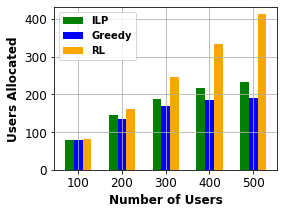

In [99]:
fig, ax = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size
num_user.plot(ax=ax, kind='bar', color= barcolor, width= 0.6)
ax.set_ylabel('Users Allocated', fontsize=12, fontweight="bold")

# ax.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax.tick_params(axis='both', labelsize=12)

ax.legend(legend, fontsize=12, loc='upper left', prop = {'weight':'bold'})
ax.grid(True)
plt.xticks(rotation=0)


fig.set_figwidth(4)
fig.set_figheight(3)

fig.savefig(f"plots/alloc_user_s50_t{thres}.pdf",dpi=100, bbox_inches = "tight")

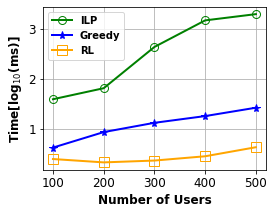

In [100]:
fig1, ax1 = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size


plt.locator_params(axis='x', nbins=5)
ax1.plot( 'ilp_time', data=time, marker='o', markerfacecolor='None', markersize=8, linewidth=2, zorder=2, color=barcolor[0])
ax1.plot( 'greedy_time', data=time, marker='*', linewidth=2, markersize=8, zorder=3, color = barcolor[1])
ax1.plot( 'rl_lin_time', data=time, marker='s', markerfacecolor='None', linewidth=2, markersize=10, color=barcolor[2])
# ax1.plot( 'rl_exp_time', data=time, marker='^', linewidth=2, markersize=6,zorder=4, color=barcolor[3])

ax1.set_ylabel('Time[log$_{10}$(ms)]', fontsize=12, fontweight="bold")
# ax1.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax1.set_xlabel("Number of Users", fontsize=12, fontweight="bold")

ax1.tick_params(axis='both', labelsize=12)
ax1.legend(legend, loc='upper left', bbox_to_anchor=(0, 1), prop = {'weight':'bold', 'size':  10})
ax1.grid(True)
plt.xticks(rotation = 0)

fig1.set_figwidth(4)
fig1.set_figheight(3)

# fig1.savefig(f"plots/alloc_time_s50_t{thres}.pdf",dpi=100, bbox_inches = "tight")